# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [26]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint


# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [27]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 618


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [28]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0



    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
    #print(city_lat)
    #print(city_lon)
    #print(city_url)

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
 
        # Create endpoint URL with each city
        #print(f'the current city is : {city}')
        city_lat = requests.get(f"http://api.openweathermap.org/geo/1.0/direct?q={city}&limit=1&appid={weather_api_key}&mode=json").json()[0]['lat']
        city_lon = requests.get(f"http://api.openweathermap.org/geo/1.0/direct?q={city}&limit=1&appid={weather_api_key}&mode=json").json()[0]['lon']  
        city_url = (f'https://api.openweathermap.org/data/2.5/weather?lat={city_lat}&lon={city_lon}&units=metric&appid={weather_api_key}')

        
        
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat =  city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['timezone']


        #Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | chilecito
Processing Record 2 of Set 1 | ushuaia
Processing Record 3 of Set 1 | adamstown
Processing Record 4 of Set 1 | grytviken
Processing Record 5 of Set 1 | edinburgh of the seven seas
Processing Record 6 of Set 1 | fortuna
Processing Record 7 of Set 1 | taiohae
City not found. Skipping...
Processing Record 8 of Set 1 | college
Processing Record 9 of Set 1 | stanley
Processing Record 10 of Set 1 | port glaud
Processing Record 11 of Set 1 | olonkinbyen
Processing Record 12 of Set 1 | bredasdorp
Processing Record 13 of Set 1 | georgetown
Processing Record 14 of Set 1 | alice springs
Processing Record 15 of Set 1 | verkhniy baskunchak
Processing Record 16 of Set 1 | margaret river
Processing Record 17 of Set 1 | hassi messaoud
Processing Record 18 of Set 1 | port elizabeth
Processing Record 19 of Set 1 | port-aux-francais
Processing Record 20 of Set 1 | papatowai
Processing Record 21 of Set 1 |

In [29]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          582
Lat           582
Lng           582
Max Temp      582
Humidity      582
Cloudiness    582
Wind Speed    582
Country       582
Date          582
dtype: int64

In [30]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,chilecito,-29.1650,-67.4954,20.53,64,1,5.06,AR,-10800
1,ushuaia,-54.8061,-68.3185,6.83,81,0,7.20,AR,-10800
2,adamstown,-25.0667,-130.1002,20.91,76,100,5.24,PN,-28800
3,grytviken,-54.2806,-36.5098,0.45,80,10,6.25,GS,-7200
4,edinburgh of the seven seas,-37.0676,-12.3108,12.56,70,97,6.71,SH,0


In [31]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [38]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,chilecito,-29.1650,-67.4954,20.53,64,1,5.06,AR,-10800
1,ushuaia,-54.8061,-68.3185,6.83,81,0,7.20,AR,-10800
2,adamstown,-25.0667,-130.1002,20.91,76,100,5.24,PN,-28800
3,grytviken,-54.2806,-36.5098,0.45,80,10,6.25,GS,-7200
4,edinburgh of the seven seas,-37.0676,-12.3108,12.56,70,97,6.71,SH,0


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

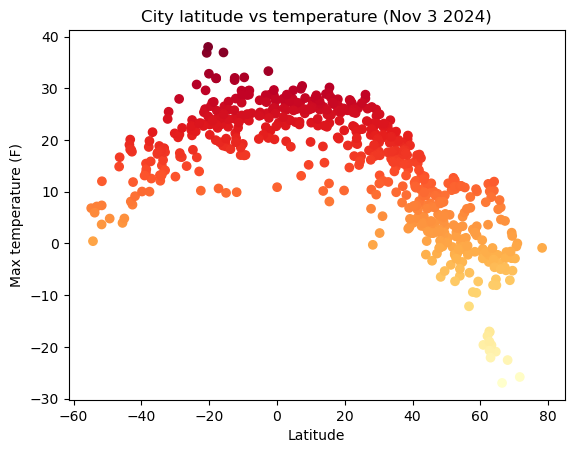

In [46]:
# Build scatter plot for latitude vs. temperature
# Incorporate the other graph properties

fig1 = plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'],c = city_data_df['Max Temp'], cmap = 'YlOrRd')
fig1 = plt.title("City latitude vs temperature (Nov 3 2024)")
fig1 = plt.xlabel("Latitude")
fig1 = plt.ylabel("Max temperature (F)")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

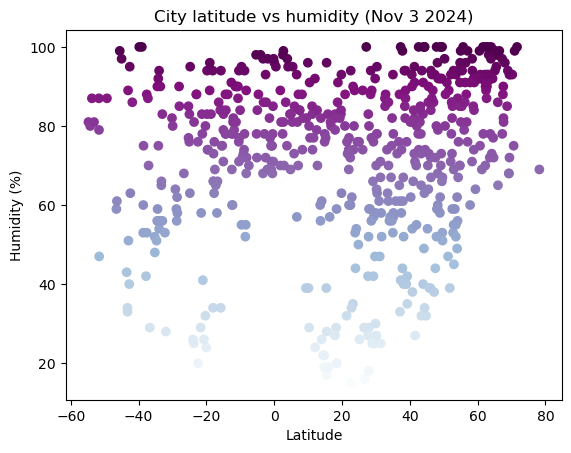

In [43]:
# Build the scatter plots for latitude vs. humidity
# Incorporate the other graph properties

fig2 = plt.scatter(city_data_df['Lat'], city_data_df['Humidity'],c = city_data_df['Humidity'], cmap = 'BuPu')
fig2 = plt.title("City latitude vs humidity (Nov 3 2024)")
fig2 = plt.xlabel("Latitude")
fig2 = plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

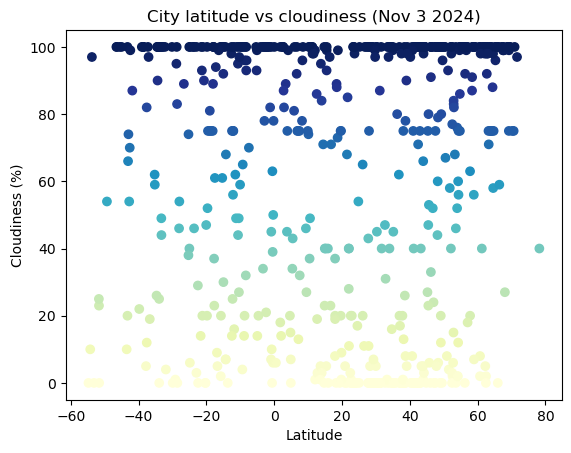

In [44]:
# Build the scatter plots for latitude vs. cloudiness
# Incorporate the other graph properties

fig3 = plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'],c = city_data_df['Cloudiness'], cmap = 'YlGnBu')
fig3 = plt.title("City latitude vs cloudiness (Nov 3 2024)")
fig3 = plt.xlabel("Latitude")
fig3 = plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

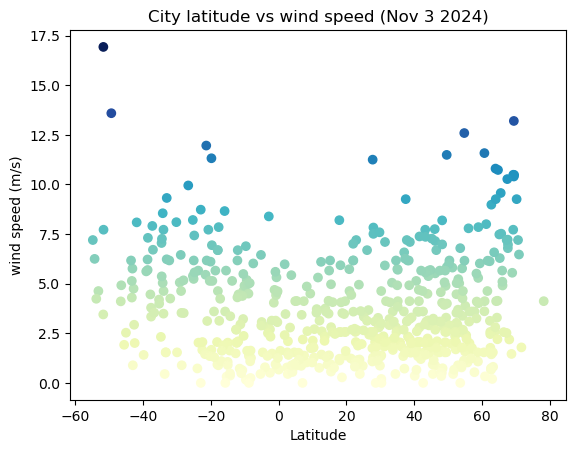

In [45]:
# Build the scatter plots for latitude vs. wind speed
# Incorporate the other graph properties

fig4 = plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'],c = city_data_df['Wind Speed'], cmap = 'YlGnBu')
fig4 = plt.title("City latitude vs wind speed (Nov 3 2024)")
fig4 = plt.xlabel("Latitude")
fig4 = plt.ylabel("wind speed (m/s)")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [149]:
# Define a function to create Linear Regression plots

def linear_r(x,y):
    fit2 = linregress(x,y)
    fit3 = fit2.intercept + fit2.slope * x
    plt.scatter(x, y, c = y, cmap = 'Blues')
    plt.plot(x, fit3, color ='red')
    title = (f'{x.name} vs {y.name}')
    plt.title(title)
    plt.xlabel(x.name)
    plt.ylabel(y.name)
    y_value = (f'y = {round(fit2.slope, 2)}x + {round(fit2.intercept,2)}')
    y_min = y.min()
    x_min = x.min()
    plt.text(x_min, y_min, y_value, color ='red')
    plt.show()
    print(f'The r^2-value is: {fit2.rvalue}')
    
    


In [150]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE

northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >= 0]


northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
5,fortuna,40.5974,-124.1560,11.75,93,0,5.14,US,-28800
6,college,45.3266,-75.8386,2.01,70,75,3.09,CA,-18000
9,olonkinbyen,70.9224,-8.7160,0.02,99,100,6.47,SJ,3600
11,georgetown,6.8137,-58.1624,27.12,81,75,3.43,GY,-14400
13,verkhniy baskunchak,48.2293,46.7230,0.58,68,60,4.04,RU,14400


In [151]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] < 0]


# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,chilecito,-29.1650,-67.4954,20.53,64,1,5.06,AR,-10800
1,ushuaia,-54.8061,-68.3185,6.83,81,0,7.20,AR,-10800
2,adamstown,-25.0667,-130.1002,20.91,76,100,5.24,PN,-28800
3,grytviken,-54.2806,-36.5098,0.45,80,10,6.25,GS,-7200
4,edinburgh of the seven seas,-37.0676,-12.3108,12.56,70,97,6.71,SH,0


###  Temperature vs. Latitude Linear Regression Plot

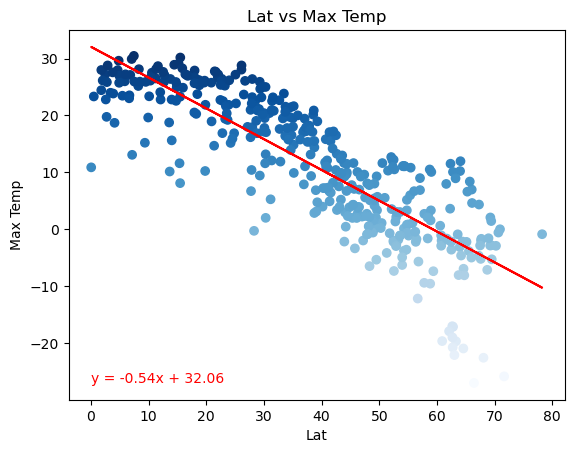

The r^2-value is: -0.8401760220785892


In [156]:
# Linear regression on Northern Hemisphere

linear_r(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'])


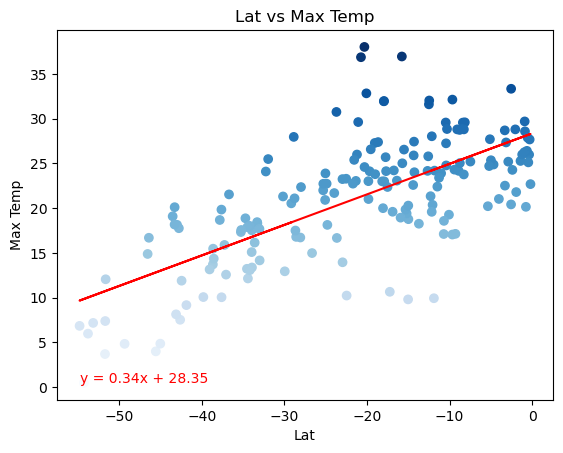

The r^2-value is: 0.6969203844918799


In [157]:
# Linear regression on Southern Hemisphere

linear_r(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'])


**Discussion about the linear relationship:** 

It is clear: we have a correlation (positive and negative, depending on the pole) that shows how temperature gets warmer as we get close to the "0" latitude, wich is the ecuator. The data shows a a strong correlation (.69 in the south and .84 in the north) 

### Humidity vs. Latitude Linear Regression Plot

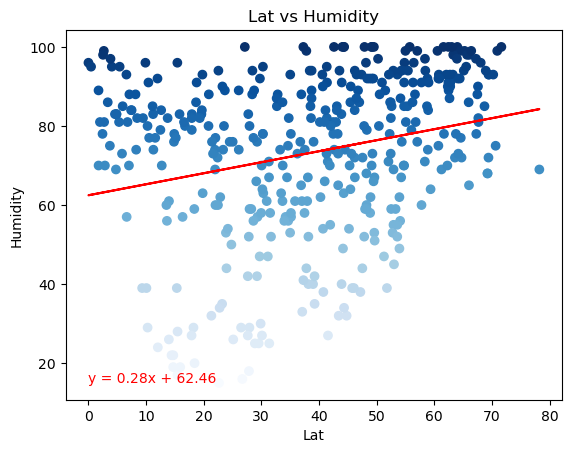

The r^2-value is: 0.2501198396133734


In [160]:
# Northern Hemisphere
linear_r(northern_hemi_df['Lat'], northern_hemi_df['Humidity'])


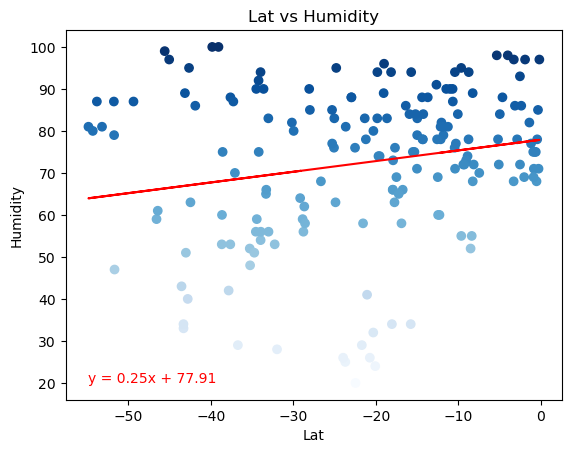

The r^2-value is: 0.19874231353572733


In [161]:
# Southern Hemisphere
linear_r(southern_hemi_df['Lat'], southern_hemi_df['Humidity'])



**Discussion about the linear relationship:** In this case we don't see a strong correlation between the latitude and the humidity, as we see opposite correlations in humidity as we get closer to the equator. It seems that, the closer we are to the north, the more humidity. 

### Cloudiness vs. Latitude Linear Regression Plot

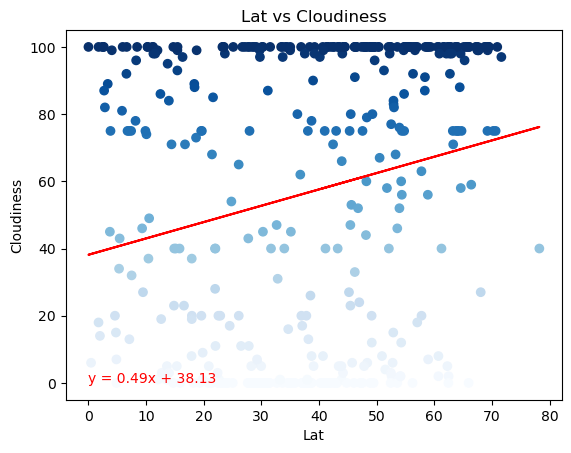

The r^2-value is: 0.2168606793989235


In [162]:
# Northern Hemisphere

linear_r(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'])


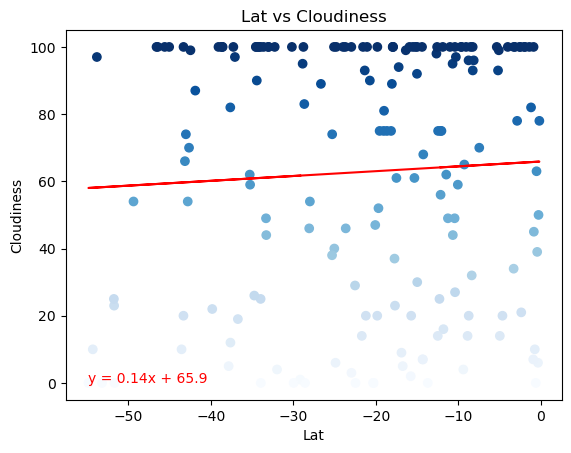

The r^2-value is: 0.05474473543365384


In [163]:
# Southern Hemisphere
linear_r(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'])


**Discussion about the linear relationship:** By the time the data was gathered, there seem to be more clouds on the northern side of the globe, this correlation makes sense considering the previous analysis, that showed a higher presence of humidity on the north. This is no coincidence, but in the long term we can not assume that the nort has more clouds (and so humidity) as this couls be a resoult of temporal weather conditions. 

### Wind Speed vs. Latitude Linear Regression Plot

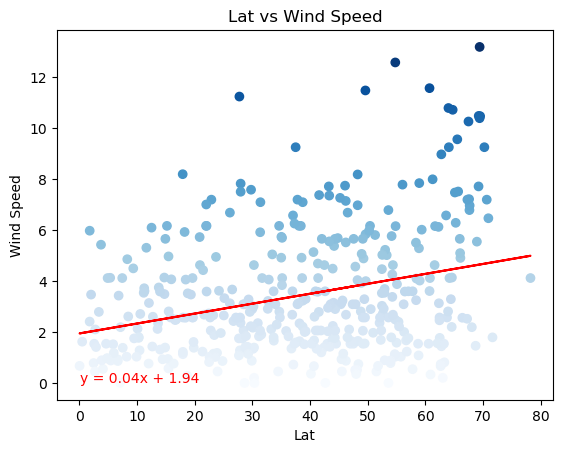

The r^2-value is: 0.2956321060312457


In [164]:
# Northern Hemisphere
linear_r(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'])


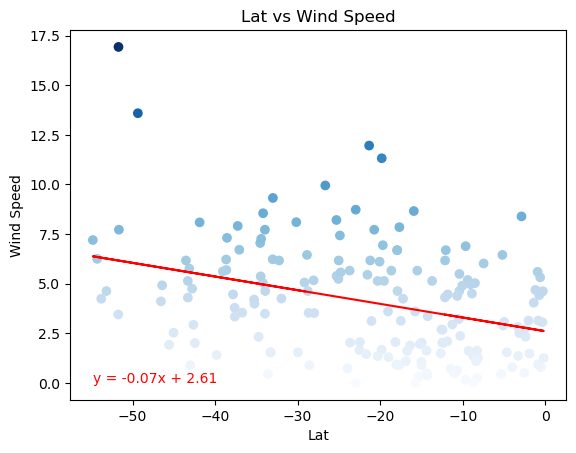

The r^2-value is: -0.35378169356946737


In [165]:
# Southern Hemisphere
linear_r(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'])


**Discussion about the linear relationship:** 
It seems that we have a windier weather as we get closer to the poles. This also can not be taken as a rule, since weather conditions may vary and the correlation index is not so strong (>.3) approx.
